# Previsão de abandono de disciplinas da Computação - UFABC
### by Jairo Freitas e colaboradores

Os dados foram preparados na sua maior parte por Bruno A. Nesta etapa ajustaremos modelos com vistas a predição do abandono de disciplinas entre os alunos da computação

## DataPrep para modelagem

In [203]:
import pandas as pd
import numpy as np

In [204]:
df = pd.read_csv('dataset.csv', sep='|')

In [205]:
df.columns

Index(['Unnamed: 0', 'ID DO ALUNO', 'ANO', 'QUADRIMESTRE', 'DISCIPLINA',
       'COD_DISCIPLINA', 'CATEGORIA', 'ANO_QUAD', 'QUAD_CURSADO',
       'ANOS_NA_UNIVER', 'SIGLA', 'T', 'P', 'I', 'CRED', 'CONCEITO',
       'CONCEITO_CRED', 'PORC_APROV', 'PORC_REPROV', 'PORC_ABANDO',
       'CRED_POR_QUAD', 'DIFERENCA_A_MEDIA', 'Z_SCORE', 'CR_ACUMULADO',
       'CR_QUAD', 'CR_ATE_QUAD_ANTERIOR', 'CR_POR_ANO', 'A', 'B', 'C', 'D',
       'F', 'O', 'APROVADO', 'REPROVADO', 'ABANDONO'],
      dtype='object')

In [206]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [207]:
df.head()

,ID DO ALUNO,ANO,QUADRIMESTRE,DISCIPLINA,COD_DISCIPLINA,CATEGORIA,ANO_QUAD,QUAD_CURSADO,ANOS_NA_UNIVER,SIGLA,...,CR_POR_ANO,A,B,C,D,F,O,APROVADO,REPROVADO,ABANDONO
0,1.0,2011.0,2º Quadrimestre,bases computacionais da ciencia,BIM0005-13,Obrigatória,2011.02º Quadrimestre,1,0,BIS0005-15,...,1.7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,2011.0,2º Quadrimestre,bases matematicas,BIN0003-13,Obrigatória,2011.02º Quadrimestre,1,0,BIS0003-15,...,1.7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,2011.0,2º Quadrimestre,iniciacao a pesquisa cientifica i,ESZX129-13,Opção Limitada,2011.02º Quadrimestre,1,0,BC2001,...,1.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,2011.0,2º Quadrimestre,origem da vida e diversidade dos seres vivos,BIL0304-13,Obrigatória,2011.02º Quadrimestre,1,0,BC0304,...,1.7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,2011.0,3º Quadrimestre,geometria analitica,BCN0404-13,Obrigatória,2011.03º Quadrimestre,2,0,BCN0404-15,...,1.7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [208]:
df_small = df[['ID DO ALUNO', 'ANO', 'QUADRIMESTRE', 'DISCIPLINA',
       'COD_DISCIPLINA', 'CATEGORIA', 'QUAD_CURSADO',
       'ANOS_NA_UNIVER', 'SIGLA', 'T', 'P', 'I', 'CRED', 'CONCEITO',
       'PORC_APROV', 'PORC_REPROV', 'PORC_ABANDO', 'CRED_POR_QUAD', 
        'DIFERENCA_A_MEDIA', 'Z_SCORE', 'CR_ATE_QUAD_ANTERIOR','APROVADO', 
        'REPROVADO', 'ABANDONO']]

In [209]:
#Gerando variáveis booleanas para categorias de disciplinas
df_small = pd.get_dummies(df_small,columns=['CATEGORIA'])

### Seleção e renomeamento de colunas

* Colunas iniciadas com **A_** contêm informações sobre o aluno
* Colunas iniciadas com **D_** contêm informações sobre a disciplina

In [210]:
df_small.columns

Index(['ID DO ALUNO', 'ANO', 'QUADRIMESTRE', 'DISCIPLINA', 'COD_DISCIPLINA',
       'QUAD_CURSADO', 'ANOS_NA_UNIVER', 'SIGLA', 'T', 'P', 'I', 'CRED',
       'CONCEITO', 'PORC_APROV', 'PORC_REPROV', 'PORC_ABANDO', 'CRED_POR_QUAD',
       'DIFERENCA_A_MEDIA', 'Z_SCORE', 'CR_ATE_QUAD_ANTERIOR', 'APROVADO',
       'REPROVADO', 'ABANDONO', 'CATEGORIA_(vazio)', 'CATEGORIA_Erro!',
       'CATEGORIA_Livre Escolha', 'CATEGORIA_Obrigatória',
       'CATEGORIA_Opção Limitada'],
      dtype='object')

In [211]:
df_small.drop(['CATEGORIA_(vazio)', 'CATEGORIA_Erro!'],axis=1,inplace=True)

In [212]:
df_small.columns

Index(['ID DO ALUNO', 'ANO', 'QUADRIMESTRE', 'DISCIPLINA', 'COD_DISCIPLINA',
       'QUAD_CURSADO', 'ANOS_NA_UNIVER', 'SIGLA', 'T', 'P', 'I', 'CRED',
       'CONCEITO', 'PORC_APROV', 'PORC_REPROV', 'PORC_ABANDO', 'CRED_POR_QUAD',
       'DIFERENCA_A_MEDIA', 'Z_SCORE', 'CR_ATE_QUAD_ANTERIOR', 'APROVADO',
       'REPROVADO', 'ABANDONO', 'CATEGORIA_Livre Escolha',
       'CATEGORIA_Obrigatória', 'CATEGORIA_Opção Limitada'],
      dtype='object')

In [213]:
df_small.columns = ['A_ID DO ALUNO', 'A_ANO', 'A_QUADRIMESTRE', 'D_DISCIPLINA',
       'D_COD_DISCIPLINA','A_QUAD_CURSADO', 'A_ANOS_NA_UNIVER', 'D_SIGLA', 
        'D_T', 'D_P', 'D_I', 'D_CRED', 'A_CONCEITO', 'D_PORC_APROV', 
        'D_PORC_REPROV', 'D_PORC_ABANDO', 'A_CRED_POR_QUAD', 'A_DIFF_CRED_POR_QUAD_A_MEDIA', 
        'A_Z_SCORE_CRED_POR_QUAD', 'A_CR_ATE_QUAD_ANTERIOR','A_APROVADO', 
        'A_REPROVADO', 'A_ABANDONO', 'D_LIVRE', 'D_OBRIGATORIA',
       'D_LIMITADA']
df_small = df_small.dropna()

### Cálculo do Coeficiente de Rendimento do grupo de matérias com sobreposição

Importação e tratamento da base de sobreposição de ementas

In [214]:
sobreposicao = pd.read_csv('data/sobreposicao_disciplinas.csv', sep='\t')
sobreposicao.head()

,Unnamed: 0,Fundamentos de Zoologia dos Invertebrados,Abordagens Tradicionais das Relações Internacionais,Aditivação de Polímeros,Administração Pública e Reforma do Estado em Perspectiva Comparada,Aerodinâmica I,Aerodinâmica II,Aeroelasticidade,Aeronáutica I-A,Aeronáutica I-B,...,Vibrações,Vida Artificial na Computação,Violência e Segurança Pública,Virologia,Visão Computacional,Web Semântica,Zoologia de Invertebrados I,Zoologia de Invertebrados II,Zoologia de Vertebrados,Zoologia Geral dos Invertebrados
0,Fundamentos de Zoologia dos Invertebrados,1.000000,0.013699,0.000000,0.034483,0.000000,0.000000,0.000000,0.017241,0.017241,...,0.000000,0.000000,0.034483,0.033898,0.000000,0.000000,0.766667,0.620690,0.379310,1.000000
1,Abordagens Tradicionais das Relações Internaci...,0.013699,1.000000,0.000000,0.068493,0.041096,0.013699,0.013699,0.027397,0.027397,...,0.000000,0.013699,0.041096,0.000000,0.000000,0.013699,0.013699,0.013699,0.013699,0.013699
2,Aditivação de Polímeros,0.000000,0.000000,1.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,...,0.088889,0.021277,0.017241,0.000000,0.044444,0.021739,0.000000,0.000000,0.000000,0.000000
3,Administração Pública e Reforma do Estado em P...,0.034483,0.068493,0.000000,1.000000,0.000000,0.000000,0.000000,0.019231,0.021277,...,0.000000,0.000000,0.086207,0.000000,0.021277,0.000000,0.033333,0.017857,0.017241,0.034483
4,Aerodinâmica I,0.000000,0.041096,0.037037,0.000000,1.000000,0.129630,0.055556,0.055556,0.074074,...,0.055556,0.000000,0.034483,0.000000,0.055556,0.037037,0.000000,0.000000,0.000000,0.000000


In [215]:
sobreposicao.rename(columns={'Unnamed: 0': 'DISCIPLINA'},inplace=True)

Veja alguns testes com disciplinas notáveis

In [216]:
sobreposicao.sort_values(by='Fenômenos Eletromagnéticos',ascending=False, axis=0)[['DISCIPLINA','Fenômenos Eletromagnéticos']].head(20)

,DISCIPLINA,Fenômenos Eletromagnéticos
347,Fenômenos Eletromagnéticos,1.000000
349,Fenômenos Térmicos,0.500000
348,Fenômenos Mecânicos,0.396552
1065,Teoria Eletromagnética,0.258621
581,Laboratório de Física II,0.237500
386,Física Ondulatória,0.219178
580,Laboratório de Física I,0.189655
410,Fundamentos de Conversão de Energia Elétrica,0.189655
630,Mecânica Geral,0.184615
720,Óptica,0.179775


In [217]:
sobreposicao.sort_values(by='Mineração de Dados',ascending=False, axis=0)[['DISCIPLINA','Mineração de Dados']].head(20)

,DISCIPLINA,Mineração de Dados
672,Mineração de Dados,1.000000
821,Processamento de Linguagem Natural,0.217391
845,Programação Paralela,0.212766
844,Programação para Web,0.170213
1172,Vida Artificial na Computação,0.170213
138,Compiladores,0.166667
576,Jogos Digitais: Aspectos Técnicos e Aplicações,0.166667
838,Programação Baseada em Componentes para Jogos,0.166667
14,Algoritmos e Estruturas de Dados I,0.159091
15,Algoritmos e Estruturas de Dados II,0.155556


Tratamento do texto

In [218]:
#Ao lidar com string e por consequencia comparações entre, realizamos uma série 
#de padronizações visando tratar erros de grafia, ou variações por acentuação

#Remoção de acentos
sobreposicao['DISCIPLINA'] = sobreposicao['DISCIPLINA'].str.normalize('NFKD')

#Para minusculas
sobreposicao['DISCIPLINA'] = sobreposicao['DISCIPLINA'].str.lower()

#Encondificação para ASCII ignorando erros
sobreposicao['DISCIPLINA'] = sobreposicao['DISCIPLINA'].str.encode('ascii', 
                                                                errors='ignore')

#Decoficação para UTF-8, formato mais empregado nessa categoria de análise
sobreposicao['DISCIPLINA'] = sobreposicao['DISCIPLINA'].str.decode('utf-8')


In [219]:
cols = ['disciplina']
cols.extend(sobreposicao['DISCIPLINA'].tolist())

sobreposicao.columns = cols

In [220]:
sobreposicao.head()

,disciplina,fundamentos de zoologia dos invertebrados,abordagens tradicionais das relacoes internacionais,aditivacao de polimeros,administracao publica e reforma do estado em perspectiva comparada,aerodinamica i,aerodinamica ii,aeroelasticidade,aeronautica i-a,aeronautica i-b,...,vibracoes,vida artificial na computacao,violencia e seguranca publica,virologia,visao computacional,web semantica,zoologia de invertebrados i,zoologia de invertebrados ii,zoologia de vertebrados,zoologia geral dos invertebrados
0,fundamentos de zoologia dos invertebrados,1.000000,0.013699,0.000000,0.034483,0.000000,0.000000,0.000000,0.017241,0.017241,...,0.000000,0.000000,0.034483,0.033898,0.000000,0.000000,0.766667,0.620690,0.379310,1.000000
1,abordagens tradicionais das relacoes internaci...,0.013699,1.000000,0.000000,0.068493,0.041096,0.013699,0.013699,0.027397,0.027397,...,0.000000,0.013699,0.041096,0.000000,0.000000,0.013699,0.013699,0.013699,0.013699,0.013699
2,aditivacao de polimeros,0.000000,0.000000,1.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,...,0.088889,0.021277,0.017241,0.000000,0.044444,0.021739,0.000000,0.000000,0.000000,0.000000
3,administracao publica e reforma do estado em p...,0.034483,0.068493,0.000000,1.000000,0.000000,0.000000,0.000000,0.019231,0.021277,...,0.000000,0.000000,0.086207,0.000000,0.021277,0.000000,0.033333,0.017857,0.017241,0.034483
4,aerodinamica i,0.000000,0.041096,0.037037,0.000000,1.000000,0.129630,0.055556,0.055556,0.074074,...,0.055556,0.000000,0.034483,0.000000,0.055556,0.037037,0.000000,0.000000,0.000000,0.000000


In [221]:
df_small.set_value(0, 'ABANDONO_CLUSTER', 1 if filt_df['A_ABANDONO'].sum()>0 else 0)

,A_ID DO ALUNO,A_ANO,A_QUADRIMESTRE,D_DISCIPLINA,D_COD_DISCIPLINA,A_QUAD_CURSADO,A_ANOS_NA_UNIVER,D_SIGLA,D_T,D_P,...,A_DIFF_CRED_POR_QUAD_A_MEDIA,A_Z_SCORE_CRED_POR_QUAD,A_CR_ATE_QUAD_ANTERIOR,A_APROVADO,A_REPROVADO,A_ABANDONO,D_LIVRE,D_OBRIGATORIA,D_LIMITADA,ABANDONO_CLUSTER
0,1.0,2011.0,2º Quadrimestre,bases computacionais da ciencia,BIM0005-13,1,0,BIS0005-15,0,2,...,0.933333,0.283190,4.000000,1.0,0.0,0.0,0,1,0,0.0
1,1.0,2011.0,2º Quadrimestre,bases matematicas,BIN0003-13,1,0,BIS0003-15,4,0,...,0.933333,0.283190,4.000000,0.0,1.0,0.0,0,1,0,NaN
2,1.0,2011.0,2º Quadrimestre,iniciacao a pesquisa cientifica i,ESZX129-13,1,0,BC2001,2,0,...,0.933333,0.283190,4.000000,1.0,0.0,0.0,0,0,1,NaN
3,1.0,2011.0,2º Quadrimestre,origem da vida e diversidade dos seres vivos,BIL0304-13,1,0,BC0304,3,0,...,0.933333,0.283190,4.000000,1.0,0.0,0.0,0,1,0,NaN
4,1.0,2011.0,3º Quadrimestre,geometria analitica,BCN0404-13,2,0,BCN0404-15,3,0,...,-1.066667,-0.323645,1.727273,0.0,1.0,0.0,0,1,0,NaN
5,1.0,2011.0,3º Quadrimestre,natureza da informacao,BCM0504-13,2,0,BCM0504-15,3,0,...,-1.066667,-0.323645,1.727273,1.0,0.0,0.0,0,1,0,NaN
6,1.0,2011.0,3º Quadrimestre,transformacoes nos seres vivos e ambiente,BCL0306-13,2,0,BC0306,3,0,...,-1.066667,-0.323645,1.727273,1.0,0.0,0.0,0,1,0,NaN
7,1.0,2012.0,1º Quadrimestre,bases matematicas,BIN0003-13,3,1,BIS0003-15,4,0,...,6.933333,2.103695,1.700000,0.0,1.0,0.0,0,1,0,NaN
8,1.0,2012.0,1º Quadrimestre,bases epistemologicas da ciencia moderna,BIR0004-13,3,1,BIR0004-15,3,0,...,6.933333,2.103695,1.700000,1.0,0.0,0.0,0,1,0,NaN
9,1.0,2012.0,1º Quadrimestre,processamento da informacao,BCM0505-13,3,1,BCM0505-15,3,2,...,6.933333,2.103695,1.700000,1.0,0.0,0.0,0,1,0,NaN


In [222]:
for i in range(0,df_small.shape[0]):
#for i in range(0,50):
    #linha atual
    id_aluno = df_small.iloc[i]['A_ID DO ALUNO']
    disciplina = df_small.iloc[i]['D_DISCIPLINA']
    quad = df_small.iloc[i]['A_QUAD_CURSADO']
    errors = 0
    try:
        #disciplinas similares
        similares = [item for sublist in sobreposicao[['disciplina']][sobreposicao[disciplina]>=0.1].values.tolist() for item in sublist]
        
        #calculará o CR apenas em disciplinas similares de quads estritamente anteriores cursadas pelo aluno atual
        filt_df = df_small.where((df_small['A_ID DO ALUNO']==id_aluno) &
                   (df_small['A_QUAD_CURSADO']<quad)&
                   (df_small['D_DISCIPLINA'].isin(similares))).dropna()
        #print(id_aluno,"\t",quad,"\t",disciplina,"(",len(similares),"similares ",filt_df.shape[0],"intersecção")
        if filt_df.shape[0]>0:
            df_small.set_value(i, 'CR_CLUSTER', (filt_df['A_CONCEITO']*filt_df['D_CRED']).sum()/filt_df['D_CRED'].sum())
            df_small.set_value(i, 'ABANDONO_CLUSTER', 1 if filt_df['A_ABANDONO'].sum()>0 else 0)
            #df_small.iloc[i]['CR_CLUSTER'] = filt_df['A_CONCEITO'].sum()/filt_df['D_CRED'].sum()
        else:
            df_small.set_value(i, 'CR_CLUSTER', 2)
            df_small.set_value(i, 'ABANDONO_CLUSTER', 0)
            #df_small.iloc[i]['CR_CLUSTER'] = 2.0
    except: #geralmente o erro ocorre se uma disciplina não existe na lista de sobreposições
        df_small.set_value(i, 'CR_CLUSTER', 2)
        df_small.set_value(i, 'ABANDONO_CLUSTER', 0)
        #df_small.iloc[i]['CR_CLUSTER'] = 2.0
        errors+=1

Para conferência, segue histograma do `CR_CLUSTER`

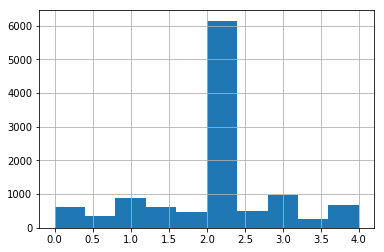

In [223]:
%matplotlib inline
df_small['CR_CLUSTER'].hist()

E também um histograma do `ABANDONO_CLUSTER`

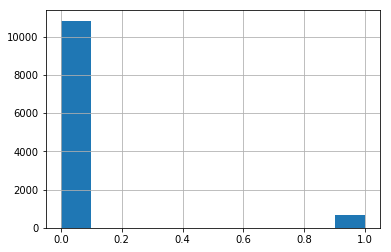

In [224]:
%matplotlib inline
df_small['ABANDONO_CLUSTER'].hist()

In [225]:
df_small = df_small.dropna()

### Dimensionamento das colunas

In [226]:
#Nova escala: 0 = primeiro quad do aluno, 1 = quad atual do aluno
df_small.loc[:,'A_QUAD_CURSADO'] = df_small.groupby(['A_ID DO ALUNO'])['A_QUAD_CURSADO'].transform(lambda x: x / x.max())

In [227]:
#MinMaxScaler para quantidade de créditos Teóricos, práticos, individuais e total
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_small[['D_T', 'D_P', 'D_I', 'D_CRED', 'A_CR_ATE_QUAD_ANTERIOR', 'CR_CLUSTER']] = scaler.fit_transform(
    df_small[['D_T', 'D_P', 'D_I', 'D_CRED','A_CR_ATE_QUAD_ANTERIOR', 'CR_CLUSTER']])

In [228]:
X = df_small[['A_QUAD_CURSADO', 'A_ANOS_NA_UNIVER',
        'D_T', 'D_P', 'D_I', 'D_CRED', 'D_PORC_APROV', 
        'D_PORC_REPROV', 'D_PORC_ABANDO', 'A_Z_SCORE_CRED_POR_QUAD', 
        'A_CR_ATE_QUAD_ANTERIOR', 'CR_CLUSTER', 'D_LIVRE', 'D_OBRIGATORIA',
       'D_LIMITADA']]
y = df_small[['A_ABANDONO']]

In [229]:
X.head(17)

,A_QUAD_CURSADO,A_ANOS_NA_UNIVER,D_T,D_P,D_I,D_CRED,D_PORC_APROV,D_PORC_REPROV,D_PORC_ABANDO,A_Z_SCORE_CRED_POR_QUAD,A_CR_ATE_QUAD_ANTERIOR,CR_CLUSTER,D_LIVRE,D_OBRIGATORIA,D_LIMITADA
0,0.066667,0.0,0.000,0.142857,0.2,0.000000,0.937107,0.044025,0.018868,0.283190,1.000000,0.500,0.0,1.0,0.0
1,0.066667,0.0,0.500,0.000000,0.5,0.166667,0.758475,0.241525,0.000000,0.283190,1.000000,0.500,0.0,1.0,0.0
2,0.066667,0.0,0.250,0.000000,0.3,0.000000,1.000000,0.000000,0.000000,0.283190,1.000000,0.500,0.0,0.0,1.0
3,0.066667,0.0,0.375,0.000000,0.4,0.083333,0.942149,0.057851,0.000000,0.283190,1.000000,0.500,0.0,1.0,0.0
4,0.133333,0.0,0.375,0.000000,0.6,0.083333,0.628571,0.331429,0.040000,-0.323645,0.431818,0.500,0.0,1.0,0.0
5,0.133333,0.0,0.375,0.000000,0.4,0.083333,0.938272,0.043210,0.018519,-0.323645,0.431818,0.500,0.0,1.0,0.0
6,0.133333,0.0,0.375,0.000000,0.4,0.083333,0.968586,0.026178,0.005236,-0.323645,0.431818,0.500,0.0,1.0,0.0
7,0.200000,1.0,0.500,0.000000,0.5,0.166667,0.758475,0.241525,0.000000,2.103695,0.425000,0.000,0.0,1.0,0.0
8,0.200000,1.0,0.375,0.000000,0.4,0.083333,0.918269,0.048077,0.033654,2.103695,0.425000,0.500,0.0,1.0,0.0
9,0.200000,1.0,0.375,0.142857,0.5,0.250000,0.850932,0.136646,0.012422,2.103695,0.425000,0.250,0.0,1.0,0.0


### Separação dos dados de treinamento e teste
OBS: Usamos estratificação

In [230]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)
y_train = y_train['A_ABANDONO'].values.tolist()
y_test = y_test['A_ABANDONO'].values.tolist()

In [231]:
print("Train: ",X_train.shape[0],"amostras com ", sum(y_train),"(",sum(y_train)/X_train.shape[0],") abandonos")
print("Test: ",X_test.shape[0],"amostras com ", sum(y_test),"(", sum(y_test)/X_test.shape[0],") abandonos")

Train:  9183 amostras com  347.0 ( 0.03778721550691495 ) abandonos
Test:  2296 amostras com  87.0 ( 0.03789198606271777 ) abandonos


## Modelagem

### Baseline aleatório - Modelo Dummy

In [232]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

def eval_model(model_name, y, y_pred):
    print("[",model_name,"]")
    print("Accuracy: ",accuracy_score(y, y_pred))
    print("Precision: ",precision_score(y, y_pred))
    print("Recall: ",recall_score(y, y_pred))  

In [233]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(random_state=42)
dummy_train_score = cross_val_score(dummy, X_train, y_train, cv=10).mean()
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)

eval_model("Dummy", y_test, y_pred_dummy)

[ Dummy ]
Accuracy:  0.9220383275261324
Precision:  0.020833333333333332
Recall:  0.022988505747126436


## Modelagem sem superamostragem

### Regressão Logística (penalização L2)

In [234]:
from sklearn.linear_model import LogisticRegressionCV 

lrn = LogisticRegressionCV(cv=10, Cs=10 ,penalty='l2', 
                           scoring='recall', solver='liblinear', random_state=42).fit(X_train, y_train)

In [235]:
y_pred_lrn = lrn.predict(X_test)

eval_model("Logistic Regression", y_test, y_pred_lrn)

[ Logistic Regression ]
Accuracy:  0.9647212543554007
Precision:  0.7142857142857143
Recall:  0.11494252873563218


### KNN

K= 1  Precision= 0.12677636967353262  Recall= 0.11529411764705881
K= 2  Precision= 0.2  Recall= 0.014453781512605044
K= 3  Precision= 0.19301587301587303  Recall= 0.03159663865546218
K= 4  Precision= 0.25  Recall= 0.008739495798319327
K= 5  Precision= 0.29500000000000004  Recall= 0.014453781512605044
K= 6  Precision= 0.4  Recall= 0.014453781512605044
K= 7  Precision= 0.3833333333333333  Recall= 0.014453781512605044
K= 8  Precision= 0.35  Recall= 0.011596638655462186
K= 9  Precision= 0.3533333333333334  Recall= 0.014453781512605044
K= 10  Precision= 0.18333333333333332  Recall= 0.008655462184873949
K= 11  Precision= 0.16666666666666666  Recall= 0.008655462184873949
K= 12  Precision= 0.15  Recall= 0.005714285714285714
K= 13  Precision= 0.2  Recall= 0.008655462184873949
K= 14  Precision= 0.0  Recall= 0.0
K= 15  Precision= 0.15  Recall= 0.005798319327731093
K= 16  Precision= 0.1  Recall= 0.002857142857142857
K= 17  Precision= 0.1  Recall= 0.002857142857142857
K= 18  Precision= 0.1  Recall=

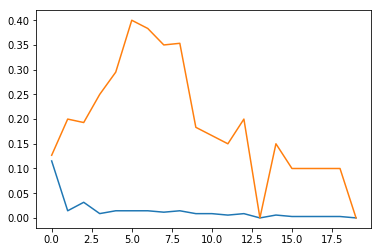

Laranja Precision, Azul Recall


In [236]:
#matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
#from sklearn.model_selection import GridSearchCV

precision2print = np.zeros(20)
recall2print = np.zeros(20)
for k in range(1, 21):
    knn_bestK = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=10, scoring='recall')
    recall2print[k-1] = knn_bestK.mean()
    knn_bestK = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=10, scoring='precision')
    precision2print[k-1] = knn_bestK.mean()
    print("K=",k," Precision=",precision2print[k-1]," Recall=",recall2print[k-1])
    

plt.plot(recall2print, label='Recall')
plt.plot(precision2print, label='Precision')
plt.show()
print("Laranja Precision, Azul Recall")

In [237]:
y_pred_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train).predict(X_test)

eval_model("KNN N=3", y_test, y_pred_knn)

[ KNN N=3 ]
Accuracy:  0.9590592334494773
Precision:  0.3157894736842105
Recall:  0.06896551724137931


A precisão do KNN sugere que talvez exista uma relação de distância entre os elementos no espaço.

### SVM

In [238]:
from sklearn.svm import SVC 

svm = SVC(gamma='auto', kernel='rbf', random_state=42)

svm_train_score = cross_val_score(svm, X_train, y_train, cv=10, scoring='recall').mean()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

eval_model("SVM", y_test, y_pred_svm)

[ SVM ]
Accuracy:  0.9625435540069687
Precision:  1.0
Recall:  0.011494252873563218


### Árvores aleatórias

In [239]:
from sklearn.ensemble import RandomForestClassifier

r_tree = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_leaf=5,  bootstrap=True, random_state=42)


r_tree_train_score = cross_val_score(r_tree, X_train, y_train, cv=10, scoring='recall').mean()
r_tree.fit(X_train, y_train)

y_pred_r_tree = r_tree.predict(X_test)

eval_model("Random Forest", y_test, y_pred_r_tree)

[ Random Forest ]
Accuracy:  0.9638501742160279
Precision:  0.7
Recall:  0.08045977011494253


In [240]:
r_tree_train_score

0.060588235294117644

Até este ponto nosso melhor modelo foi uma **regressão logística com penalizaçao L2**:

Accuracy:  96,47%<br>
Precision: 71,43%<br>
**Recall:  11,49%**

## Modelagem com  superamostragem

In [241]:
#índices dos exemplos com abandono no dataset de treinamento
i_y_train_pos = np.array(y_train)
i_y_train_pos = np.argwhere(i_y_train_pos>0).flatten()

In [242]:
#índices dos exemplos sem abandono no dataset de treinamento
i_y_train_neg = np.array(y_train)
i_y_train_neg = np.argwhere(i_y_train_neg==0).flatten()

In [243]:
len(i_y_train_neg)

8836

In [251]:
#X_train e y_train das amostas com abandono
X_train_pos = X_train.iloc[i_y_train_pos].copy()
y_train_pos = np.array(y_train)[i_y_train_pos.tolist()].tolist()

In [290]:
#X_train e y_train de conjunto de amostras sem abandono com mesmo tamanho que o conjunto com abandono
imbalance_f = 0.5
X_train_neg = X_train.iloc[i_y_train_neg].copy().sample(n=int(imbalance_f*len(i_y_train_pos)), random_state=42).copy()
y_train_neg = np.zeros(int(imbalance_f*len(i_y_train_pos))).tolist()

In [291]:
X_train_oversample = pd.concat([X_train_pos, X_train_neg], axis=0)
y_train_oversample = (y_train_neg + y_train_pos)

In [288]:
int(0.5*len(i_y_train_pos))

173

### Regressão Logística

In [292]:
lrn_oversample = LogisticRegressionCV(cv=10, Cs=10 ,penalty='l2', 
                           scoring='recall', solver='liblinear', 
                                      random_state=42).fit(X_train_oversample, y_train_oversample)

y_pred_lrn_oversample = lrn_oversample.predict(X_test)

eval_model("Logistic Regression", y_test, y_pred_lrn_oversample)

[ Logistic Regression ]
Accuracy:  0.03789198606271777
Precision:  0.03789198606271777
Recall:  1.0


### Árvores Aleatórias

In [293]:
r_tree_train_score = cross_val_score(r_tree, X_train_oversample, y_train_oversample, cv=10, scoring='recall').mean()
r_tree.fit(X_train_oversample, y_train_oversample)

y_pred_r_tree_oversample = r_tree.predict(X_test)

eval_model("Random Forest", y_test, y_pred_r_tree_oversample)

[ Random Forest ]
Accuracy:  0.07317073170731707
Precision:  0.030372756557754257
Recall:  0.7586206896551724


In [272]:
r_tree_train_score

0.26554621848739496

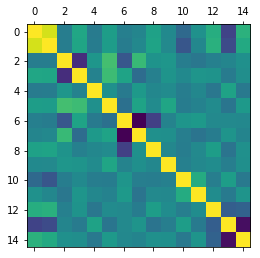

In [294]:
import matplotlib.pyplot as plt

plt.matshow(X_train.corr())
plt.show()

In [295]:
X_train.corr()

,A_QUAD_CURSADO,A_ANOS_NA_UNIVER,D_T,D_P,D_I,D_CRED,D_PORC_APROV,D_PORC_REPROV,D_PORC_ABANDO,A_Z_SCORE_CRED_POR_QUAD,A_CR_ATE_QUAD_ANTERIOR,CR_CLUSTER,D_LIVRE,D_OBRIGATORIA,D_LIMITADA
A_QUAD_CURSADO,1.000000,0.875095,-0.085231,0.229036,-0.097606,0.166338,-0.068302,-0.028845,0.197061,0.008386,-0.241075,0.070784,0.290518,-0.500206,0.326901
A_ANOS_NA_UNIVER,0.875095,1.000000,-0.085463,0.220718,-0.094238,0.156349,-0.092873,-0.006236,0.208267,0.000619,-0.376960,-0.013524,0.309652,-0.449041,0.263103
D_T,-0.085231,-0.085463,1.000000,-0.639333,0.104355,0.440016,-0.368022,0.386348,0.081505,0.103093,-0.087476,-0.139056,-0.059701,-0.025637,0.062575
D_P,0.229036,0.220718,-0.639333,1.000000,-0.050914,0.409174,0.212714,-0.214418,-0.063194,0.089468,0.011351,0.098461,0.085368,-0.102115,0.050137
D_I,-0.097606,-0.094238,0.104355,-0.050914,1.000000,0.064374,-0.107299,0.130182,-0.007973,0.023249,-0.084031,-0.010364,-0.132597,0.199369,-0.119788
D_CRED,0.166338,0.156349,0.440016,0.409174,0.064374,1.000000,-0.188299,0.208057,0.022918,0.226821,-0.090549,-0.050025,0.028852,-0.149677,0.132808
D_PORC_APROV,-0.068302,-0.092873,-0.368022,0.212714,-0.107299,-0.188299,1.000000,-0.882364,-0.524426,-0.041536,0.102122,0.134597,0.001081,0.000039,-0.000228
D_PORC_REPROV,-0.028845,-0.006236,0.386348,-0.214418,0.130182,0.208057,-0.882364,1.000000,0.062067,0.053379,-0.074252,-0.160590,-0.091452,0.089168,-0.034018
D_PORC_ABANDO,0.197061,0.208267,0.081505,-0.063194,-0.007973,0.022918,-0.524426,0.062067,1.000000,-0.008489,-0.082248,0.005096,0.163183,-0.161427,0.062037
A_Z_SCORE_CRED_POR_QUAD,0.008386,0.000619,0.103093,0.089468,0.023249,0.226821,-0.041536,0.053379,-0.008489,1.000000,-0.065561,-0.000270,0.031510,-0.073582,0.054064


In [296]:
X_train.columns

Index(['A_QUAD_CURSADO', 'A_ANOS_NA_UNIVER', 'D_T', 'D_P', 'D_I', 'D_CRED',
       'D_PORC_APROV', 'D_PORC_REPROV', 'D_PORC_ABANDO',
       'A_Z_SCORE_CRED_POR_QUAD', 'A_CR_ATE_QUAD_ANTERIOR', 'CR_CLUSTER',
       'D_LIVRE', 'D_OBRIGATORIA', 'D_LIMITADA'],
      dtype='object')

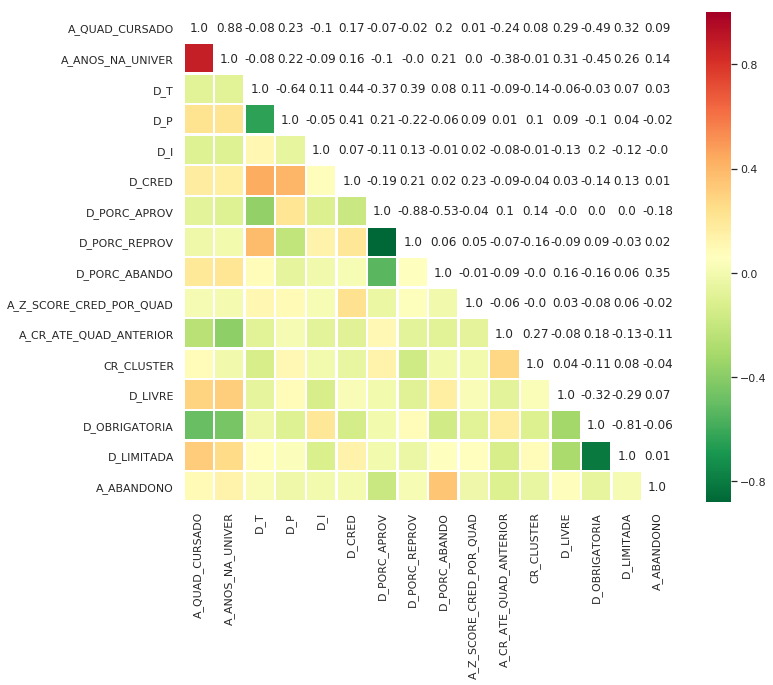

In [304]:
df_xy = pd.concat([X, y],axis=1)

import seaborn
from matplotlib.colors import ListedColormap
from matplotlib.pylab import *

seaborn.set(rc={'figure.figsize':(12,9)})

df_corr = df_xy.corr()
labels = df_corr.where(np.triu(np.ones(df_corr.shape)).astype(np.bool))
labels = labels.round(2)
labels = labels.replace(np.nan,' ', regex=True)

mask = np.triu(np.ones(df_corr.shape)).astype(np.bool)
ax = seaborn.heatmap(df_corr, mask=mask, cmap='RdYlGn_r', fmt='', square=True, linewidths=1.5)
mask = np.ones((df_corr.shape[0], df_corr.shape[1]))-mask
ax = seaborn.heatmap(df_corr, mask=mask, cmap=ListedColormap(['white']),annot=labels,cbar=False, fmt='', linewidths=1.5)

plt.show()

In [305]:
df_xy.columns

Index(['A_QUAD_CURSADO', 'A_ANOS_NA_UNIVER', 'D_T', 'D_P', 'D_I', 'D_CRED',
       'D_PORC_APROV', 'D_PORC_REPROV', 'D_PORC_ABANDO',
       'A_Z_SCORE_CRED_POR_QUAD', 'A_CR_ATE_QUAD_ANTERIOR', 'CR_CLUSTER',
       'D_LIVRE', 'D_OBRIGATORIA', 'D_LIMITADA', 'A_ABANDONO'],
      dtype='object')

## Teste com menos variáveis

In [315]:
variables = ['A_QUAD_CURSADO', 'D_CRED','D_PORC_APROV', 'D_PORC_ABANDO', 'A_Z_SCORE_CRED_POR_QUAD', 
         'A_CR_ATE_QUAD_ANTERIOR', 'CR_CLUSTER']
X_train_reduced = X_train[variables]
X_test_reduced = X_test[variables]

In [316]:
lrn_reduced = LogisticRegressionCV(cv=10, Cs=10 ,penalty='l2', 
                           scoring='recall', solver='liblinear', 
                                      random_state=42).fit(X_train_reduced, y_train)

y_pred_lrn_reduced = lrn_reduced.predict(X_test_reduced)

eval_model("Logistic Regression", y_test, y_pred_lrn_reduced)

[ Logistic Regression ]
Accuracy:  0.9638501742160279
Precision:  0.6428571428571429
Recall:  0.10344827586206896


In [320]:
r_tree_reduced = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_leaf=5,  bootstrap=True, random_state=42)


r_tree_train_score_reduced = cross_val_score(r_tree_reduced, X_train_reduced, y_train, cv=10, scoring='recall').mean()
r_tree_reduced.fit(X_train_reduced, y_train)

y_pred_r_tree_reduced = r_tree_reduced.predict(X_test_reduced)

eval_model("Random Forest", y_test, y_pred_r_tree_reduced)

[ Random Forest ]
Accuracy:  0.9642857142857143
Precision:  0.7272727272727273
Recall:  0.09195402298850575
